# Mini Project - Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

## Stage 1: Data Preprocessing

1. Download file Dataset 
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat sesuai dengan skala ukur pada data) 
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "PernahBekerja")
4. Membuang data yang tidak diperlukan (Hint: Cari dan buang kolom yang memiliki satu unique value (konstanta) Pernah Bekerja)

### Import File and Libraries

In [ ]:
!gdown 1Lb0eFa3LXaBdyWeXz1aaeyYPNxAGV8wq

Downloading...
From: https://drive.google.com/uc?id=1Lb0eFa3LXaBdyWeXz1aaeyYPNxAGV8wq
To: /content/hr_data.csv
100% 71.4k/71.4k [00:00<00:00, 71.4MB/s]


https://drive.google.com/file/d/1Lb0eFa3LXaBdyWeXz1aaeyYPNxAGV8wq/view?usp=share_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from google.colab import files
from datetime import datetime
import time 

In [ ]:
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from hyperopt import hp, tpe, STATUS_OK, Trials, fmin, space_eval
from hyperopt.pyll.stochastic import sample

from timeit import default_timer as timer
from sklearn.model_selection import cross_val_score

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [ ]:
df = pd.read_csv('/content/hr_data.csv')
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
117,contentAbalone0,101331,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,Google_Search,4,4.0,0.0,0.0,7.0,+6282255326xxx,contentAbalone0699@icloud.com,Sarjana,1,0.0,masih_bekerja,1979-05-01,2011-02-07,2014-03-04,-
100,worldlyPaella8,111157,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,14.0,+6285508465xxx,worldlyPaella8406@yahoo.com,Sarjana,1,NaN,masih_bekerja,1986-07-07,2014-01-06,2020-2-26,-
76,solemnLemur7,106462,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Bagus,Jakarta Pusat,Employee_Referral,2,5.0,0.0,0.0,4.0,+6283842230xxx,solemnLemur7109@gmail.com,Magister,1,NaN,masih_bekerja,1985-01-28,2013-07-08,2020-02-11,-
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
92,boredHyena0,101306,Menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,3.0,0.0,0.0,17.0,+6285758275xxx,boredHyena0206@hotmail.com,Sarjana,1,NaN,masih_bekerja,1952-02-11,2012-5-14,2014-07-02,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
# Check the unique values
for i in df.columns:
  print('------------------------------')
  print(i,"column's unique values are:",df[i].unique())
  print('------------------------------', '\n')

------------------------------
Username column's unique values are: ['spiritedPorpoise3' 'jealousGelding2' 'pluckyMuesli3' 'stressedTruffle1'
 'shyTermite7' 'emptyMacaw4' 'madZebra1' 'cynicalMandrill7' 'lyingMussel8'
 'enviousMoth4' 'puzzledCake4' 'grizzledSnipe7' 'yearningBagels0'
 'sheepishSheep9' 'madWildfowl7' 'enviousSalami4' 'pacifiedRaisins7'
 'wrathfulMagpie6' 'hushedSeahorse7' 'guiltyMoth4' 'peacefulCoati5'
 'dejectedPolenta7' 'needfulLeopard2' 'offendedIguana0' 'pluckyHoopoe3'
 'needySyrup4' 'forsakenOwl1' 'pluckyApples4' 'guiltySnail8'
 'grizzledFlamingo9' 'worriedSyrup7' 'somberBoars0' 'giddyMallard9'
 'madFerret4' 'mereCaribou1' 'decimalAbalone6' 'blissfulMussel3'
 'ardentLapwing0' 'peskyTeal7' 'blissfulHyena1' 'solidMacaw1'
 'cautiousPolenta9' 'excludedPorpoise4' 'shamefulIguana0' 'shySyrup7'
 'forsakenCow7' 'grumpyFish4' 'wingedPorpoise5' 'soreCaribou0'
 'needfulCardinal0' 'giddyCheetah9' 'hushedOil9' 'crummyPudding5'
 'selfishBasmati2' 'adoringCardinal9' 'importedAprico

In [ ]:
# Check total columns value
for col in df:
    print('------------------------------')
    print(f'''Unique Value count kolom {col}:''')
    print(df[col].value_counts())
    print('------------------------------', '\n')

------------------------------
Unique Value count kolom Username:
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64
------------------------------ 

------------------------------
Unique Value count kolom EnterpriseID:
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: EnterpriseID, Length: 287, dtype: int64
------------------------------ 

------------------------------
Unique Value count kolom StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64
------------------------------ 

------------------------------
Unique Value count kolom JenisKelamin:
Wanita

### Handling Duplicated Data

In [ ]:
df.duplicated().any()

False

In [ ]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Username, EnterpriseID, StatusPernikahan, JenisKelamin, StatusKepegawaian, Pekerjaan, JenjangKarir, PerformancePegawai, AsalDaerah, HiringPlatform, SkorSurveyEngagement, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran, NomorHP, Email, TingkatPendidikan, PernahBekerja, IkutProgramLOP, AlasanResign, TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign]
Index: []


### Handling Null Values

In [ ]:
# Checking null data
df.isna().sum().sort_values(ascending=False)

IkutProgramLOP                        258
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
TanggalPenilaianKaryawan                0
TanggalHiring                           0
TanggalLahir                            0
PernahBekerja                           0
TingkatPendidikan                       0
Email                                   0
NomorHP                                 0
Username                                0
EnterpriseID                            0
SkorSurveyEngagement                    0
HiringPlatform                          0
AsalDaerah                              0
PerformancePegawai                      0
JenjangKarir                            0
Pekerjaan                               0
StatusKepegawaian                       0
JenisKelamin                            0
StatusPernikahan                  

In [ ]:
novalue = df.isna().sum()*100/len(df)
print(round(novalue, 4).sort_values(ascending=False))

IkutProgramLOP                        89.8955
AlasanResign                          22.9965
JumlahKetidakhadiran                   2.0906
SkorKepuasanPegawai                    1.7422
JumlahKeikutsertaanProjek              1.0453
JumlahKeterlambatanSebulanTerakhir     0.3484
TanggalPenilaianKaryawan               0.0000
TanggalHiring                          0.0000
TanggalLahir                           0.0000
PernahBekerja                          0.0000
TingkatPendidikan                      0.0000
Email                                  0.0000
NomorHP                                0.0000
Username                               0.0000
EnterpriseID                           0.0000
SkorSurveyEngagement                   0.0000
HiringPlatform                         0.0000
AsalDaerah                             0.0000
PerformancePegawai                     0.0000
JenjangKarir                           0.0000
Pekerjaan                              0.0000
StatusKepegawaian                 

In [ ]:
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)
df['StatusPernikahan'].fillna(df['StatusPernikahan'].mode()[0], inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

IkutProgramLOP                        258
Username                                0
JumlahKeterlambatanSebulanTerakhir      0
TanggalPenilaianKaryawan                0
TanggalHiring                           0
TanggalLahir                            0
AlasanResign                            0
PernahBekerja                           0
TingkatPendidikan                       0
Email                                   0
NomorHP                                 0
JumlahKetidakhadiran                    0
JumlahKeikutsertaanProjek               0
EnterpriseID                            0
SkorKepuasanPegawai                     0
SkorSurveyEngagement                    0
HiringPlatform                          0
AsalDaerah                              0
PerformancePegawai                      0
JenjangKarir                            0
Pekerjaan                               0
StatusKepegawaian                       0
JenisKelamin                            0
StatusPernikahan                  

### Adjusting Data

In [ ]:
df['SkorKepuasanPegawai'] =  df['SkorKepuasanPegawai'].astype('int64')
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].astype('int64')
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].astype('int64')
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].astype('int64')
df['PernahBekerja'] = df['PernahBekerja'].replace('yes',1)
df['PernahBekerja'].value_counts()

1    286
1      1
Name: PernahBekerja, dtype: int64

### Drop Unused Data

In [ ]:
# Drop Unnecesary Column
df = df.drop(columns=['Username', 'PernahBekerja', 'IkutProgramLOP'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   EnterpriseID                        287 non-null    int64 
 1   StatusPernikahan                    287 non-null    object
 2   JenisKelamin                        287 non-null    object
 3   StatusKepegawaian                   287 non-null    object
 4   Pekerjaan                           287 non-null    object
 5   JenjangKarir                        287 non-null    object
 6   PerformancePegawai                  287 non-null    object
 7   AsalDaerah                          287 non-null    object
 8   HiringPlatform                      287 non-null    object
 9   SkorSurveyEngagement                287 non-null    int64 
 10  SkorKepuasanPegawai                 287 non-null    int64 
 11  JumlahKeikutsertaanProjek           287 non-null    int64 

## Stage 2: Annual Report on Employee Number Changes

1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign) 
2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh (Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu) 
3. Lakukan imputation pada data tahun yang kosong sesuai urutan (Hint: Gunakan fillna) 
4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2) (Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya) 
5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada (Hint: Perhatikan jenis plot yang digunakan) 
6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Jelaskan kondisi perusahaan apakah sedang sehat / mengkhawatirkan berdasarkan jumlah karyawan tahunan)

In [ ]:
df['TanggalResign'] = df['TanggalResign'].replace('-',np.nan)

In [ ]:
today = datetime.today()
df['TanggalResign'].fillna(today.strftime('%Y-%m-%d'), inplace=True)

In [ ]:
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

In [ ]:
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

In [ ]:
df['TahunResign'] = df['TahunResign'].replace(2023, 'Tidak Resign')

### Employee Hiring

In [ ]:
df_hire = df.groupby(['TahunHiring'])['EnterpriseID'].count().reset_index()
df_hire.columns=(['Tahun','TotalHiring'])
df_hire

,Tahun,TotalHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


### Employee Resigned

In [ ]:
df_resign = df.groupby(['TahunResign'])['EnterpriseID'].count().reset_index()
df_resign.columns=(['Tahun', 'TotalResign'])
df_resign

,Tahun,TotalResign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6
8,Tidak Resign,198


### Employee Changeover

In [ ]:
annrep = df_hire.merge(df_resign, on='Tahun', how='outer')
annrep = annrep.fillna(0)
annrep = annrep.drop(annrep.index[-1])
annrep = annrep.astype('int64')
annrep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Tahun        15 non-null     int64
 1   TotalHiring  15 non-null     int64
 2   TotalResign  15 non-null     int64
dtypes: int64(3)
memory usage: 480.0 bytes


In [ ]:
annrep['employee'] = annrep['TotalHiring'].cumsum() - annrep['TotalResign']
annrep['change-over'] = annrep['TotalHiring'] - annrep['TotalResign']
annrep

,Tahun,TotalHiring,TotalResign,employee,change-over
0,2006,1,0,1,1
1,2007,2,0,3,2
2,2008,2,0,5,2
3,2009,7,0,12,7
4,2010,8,0,20,8
5,2011,76,0,96,76
6,2012,41,0,137,41
7,2013,43,5,175,38
8,2014,56,12,224,44
9,2015,31,8,259,23


### Visualization

In [ ]:
layout = go.Layout(
    title= 'Dynamics of Total Employees (2006 - 2021)',
    showlegend=False,
    yaxis=dict(title='Total Employee'),
    xaxis=dict(title='Year')
    
)

all_employees = int(annrep['TotalHiring'].sum()-annrep['TotalResign'].sum())

fig = go.Figure(go.Waterfall(
    name = '20', orientation = 'v',
    measure = ['relative' for x in range(len(annrep['change-over']))]+['total'],
    x = annrep['Tahun'].tolist()+[2021],
    textposition = 'outside',
    text = [str(x) if x <=0 else "+"+str(x) for x in annrep['change-over']]+[str(all_employees)],
    y = annrep['change-over'].tolist()+[str(all_employees)],
    connector = {'line':{'color':'rgb(63, 63, 63)', 'dash':'solid'}},
    ), 
    layout= layout
)

fig.show()

### Interpretation

In summary, the company has had a total of 287 new hires from 2006 to 2018 and 89 resignations from 2013 to 2020, leaving 198 remaining employees in 2021. The highest number of new hires occurred in 2011, while the highest number of resignations happened in 2018. Additionally, the company has reduced its recruitment of new employees since 2015 and had a hiring freeze since 2019. There was also a high turnover rate in 2017-2018, possibly due to poor financial conditions that require further investigation.

## Stage 3: Resign Reason Analysis for Employee Attrition Management Strategy

1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi ***jumlah employee*** berdasarkan pekerjaan, yang sudah ***resign*** maupun yang ***belum resign*** (Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum)
2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan (Hint: Gunakan outer join)
3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu ***jumlah employee*** dan **persentase jumlah employee yang masih ada (belum resign)** (Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee)
4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya (Hint: Perhatikan jenis plot yang digunakan)
5. Divisi yang memiliki ***tingkat resign tertinggi***, buatlah tabel agregasi untuk menghitung **jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign** (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat) 
6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya (Hint: Perhatikan jenis plot yang digunakan) 
7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan manajemen agar tidak terjadi lagi hal yang seperti itu)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   EnterpriseID                        287 non-null    int64         
 1   StatusPernikahan                    287 non-null    object        
 2   JenisKelamin                        287 non-null    object        
 3   StatusKepegawaian                   287 non-null    object        
 4   Pekerjaan                           287 non-null    object        
 5   JenjangKarir                        287 non-null    object        
 6   PerformancePegawai                  287 non-null    object        
 7   AsalDaerah                          287 non-null    object        
 8   HiringPlatform                      287 non-null    object        
 9   SkorSurveyEngagement                287 non-null    int64         
 10  SkorKepuasanPegawai       

In [ ]:
#Resign Status
df['resign'] = np.where(df['TahunResign']=='Tidak Resign', 0, 1)

In [ ]:
df.sample(5)

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,resign
134,106109,Lainnya,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Website,4,3,0,0,16,+6289724050xxx,grudgingMuesli6971@icloud.com,Sarjana,masih_bekerja,1988-12-27,2012-04-30,2020-01-29,2023-04-19,2012,Tidak Resign,0
151,100906,Lainnya,Pria,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Barat,Google_Search,3,4,0,0,1,+6289558729xxx,joyfulMacaw9993@yahoo.com,Sarjana,tidak_bisa_remote,1984-01-04,2012-08-13,2020-02-11,2017-06-04,2012,2017,1
277,106073,Belum_menikah,Pria,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Utara,LinkedIn,4,5,0,0,13,+6283346575xxx,exactingZebra6270@icloud.com,Magister,masih_bekerja,1986-12-09,2012-07-09,2020-02-04,2023-04-19,2012,Tidak Resign,0
176,101647,Bercerai,Pria,Outsource,Software Engineer (Back End),Mid_level,Biasa,Jakarta Pusat,LinkedIn,3,5,5,0,1,+6285890385xxx,shamefulSalami8906@proton.com,Magister,masih_bekerja,1983-05-06,2014-07-07,2020-02-18,2023-04-19,2014,Tidak Resign,0
86,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5,7,0,2,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,2016,2017,1


In [ ]:
df['resign'].value_counts()

0    198
1     89
Name: resign, dtype: int64

### Employee Job Position

In [ ]:
jobpos = df.query('resign==0').groupby('Pekerjaan')['EnterpriseID'].count().reset_index()
jobpos.columns=(['Pekerjaan','ExistingEmployee'])
jobpos

,Pekerjaan,ExistingEmployee
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


### Employee Resign Position

In [ ]:
respos = df.query('resign==1').groupby('Pekerjaan')['EnterpriseID'].count().reset_index()
respos.columns=(['Pekerjaan','ResignedEmployee'])
respos

,Pekerjaan,ResignedEmployee
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


### Employee Turnover Level

In [ ]:
resrea = jobpos.merge(respos, on='Pekerjaan', how='outer')
resrea = resrea.fillna(0)
resrea['ResignedEmployee'] = resrea['ResignedEmployee'].astype('int64')
resrea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pekerjaan         14 non-null     object
 1   ExistingEmployee  14 non-null     int64 
 2   ResignedEmployee  14 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 448.0+ bytes


In [ ]:
resrea

,Pekerjaan,ExistingEmployee,ResignedEmployee
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Digital Product Manager,2,0
4,Machine Learning Engineer,2,0
5,Product Design (UI & UX),15,9
6,Product Design (UX Researcher),1,0
7,Product Manager,11,6
8,Scrum Master,3,0
9,Software Architect,1,0


In [ ]:
resrea['TotalEmployee'] = resrea['ExistingEmployee'] + resrea['ResignedEmployee']
resrea['PercentageExistingEmployee'] = round((resrea['ExistingEmployee']/resrea['TotalEmployee'])*100, 3)
resrea.sort_values(['PercentageExistingEmployee'])

,Pekerjaan,ExistingEmployee,ResignedEmployee,TotalEmployee,PercentageExistingEmployee
0,Data Analyst,8,8,16,50.000
12,Software Engineer (Front End),44,28,72,61.111
5,Product Design (UI & UX),15,9,24,62.500
7,Product Manager,11,6,17,64.706
1,Data Engineer,7,3,10,70.000
10,Software Engineer (Android),17,7,24,70.833
11,Software Engineer (Back End),81,28,109,74.312
2,DevOps Engineer,3,0,3,100.000
3,Digital Product Manager,2,0,2,100.000
4,Machine Learning Engineer,2,0,2,100.000


### Visualization

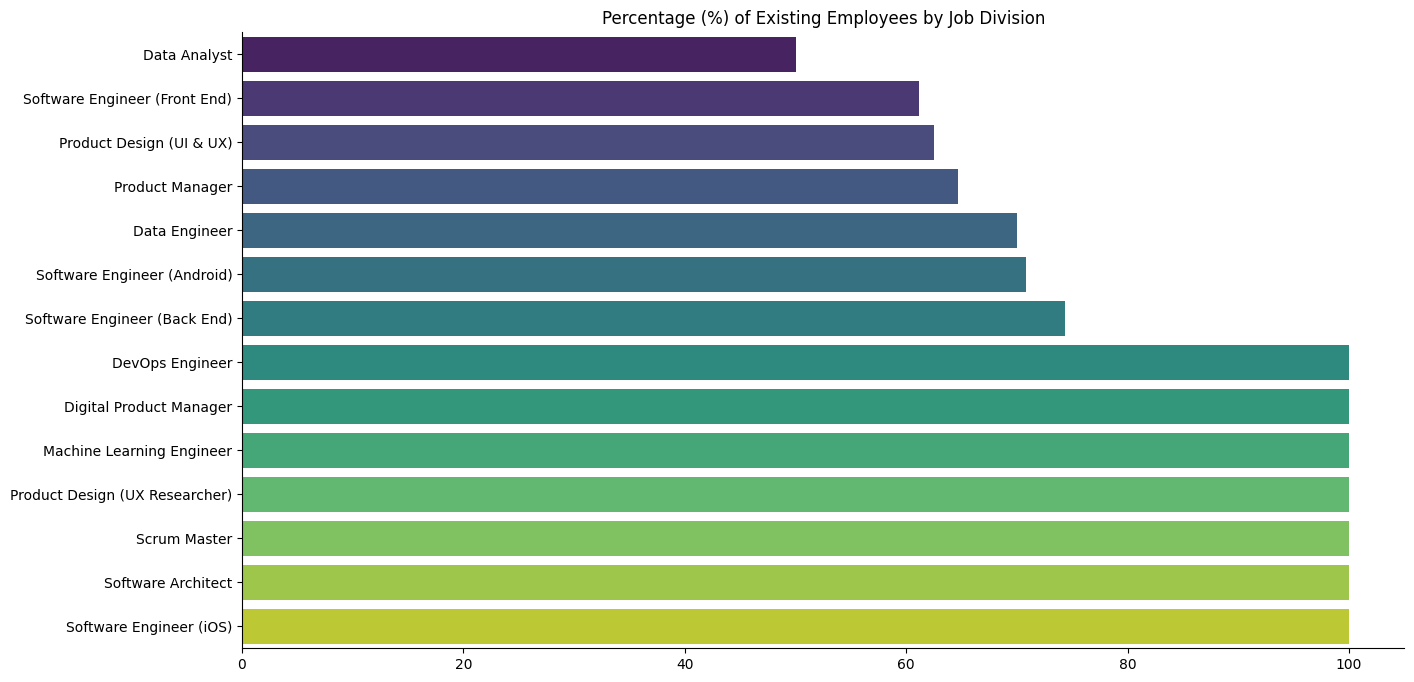

In [ ]:
plt.figure(figsize=(15,8))

ax1 = sns.barplot(y = 'Pekerjaan', x = 'PercentageExistingEmployee', data = resrea.sort_values(['PercentageExistingEmployee']), palette='viridis')
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Percentage (%) of Existing Employees by Job Division')
plt.show()

Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat)

### Employee Reason of the Highest Resigned Level

In [ ]:
dr = df.query('Pekerjaan == "Data Analyst"').groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['EnterpriseID'].count().reset_index()
dr.columns=(['JenjangKarir', 'PerformancePegawai', 'AlasanResign', 'TotalEmployee'])
dr

,JenjangKarir,PerformancePegawai,AlasanResign,TotalEmployee
0,Freshgraduate_program,Bagus,masih_bekerja,1
1,Freshgraduate_program,Bagus,toxic_culture,1
2,Freshgraduate_program,Biasa,internal_conflict,1
3,Freshgraduate_program,Biasa,masih_bekerja,1
4,Freshgraduate_program,Biasa,toxic_culture,1
5,Freshgraduate_program,Sangat_bagus,internal_conflict,1
6,Freshgraduate_program,Sangat_bagus,toxic_culture,3
7,Freshgraduate_program,Sangat_kurang,toxic_culture,1
8,Mid_level,Bagus,masih_bekerja,1
9,Mid_level,Kurang,masih_bekerja,1


### Visualization

In [ ]:
plt.figure(figsize=(15,10))
fig = px.sunburst(dr, path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='TotalEmployee',
                 title= 'Resigned Employees from Data Analyst Division Based on Career Path, Performance, and Reasons for Resignation',
                 width = 1000, height = 800)
fig.show()

<Figure size 1500x1000 with 0 Axes>

Data Analyst division is dominated by Fresh Graduate Program employees for aroud 70% while the rest is Mid-Level.
On every level of performance given, employees in fresh graduate program career path tends to take resignment with reasons like toxic_culture and internal conflict, leaving only 20% of the remaining.
All employees with Mid-Level career path tends to stay in the company.

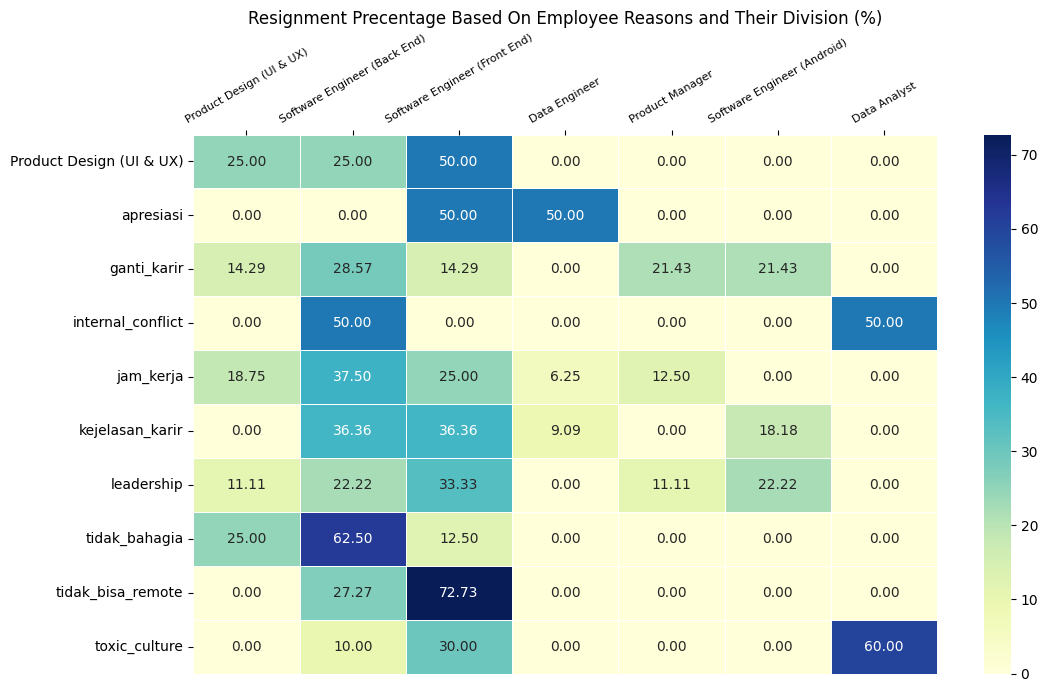

In [ ]:
dfscore = df.query('resign==1').groupby(['AlasanResign','Pekerjaan'])['EnterpriseID'].count().reset_index()

review_matrix = []
performance_sort = dfscore["Pekerjaan"].unique()
for x in dfscore["AlasanResign"].unique():
    temp_df = dfscore[dfscore["AlasanResign"]==x].set_index("Pekerjaan")["EnterpriseID"].reindex(performance_sort).fillna(0)
    temp_vector = [int(x) for x in temp_df.reset_index()["EnterpriseID"]]
    review_matrix.append(temp_vector)
    
#store as data frame
review_pivot = pd.DataFrame(review_matrix,columns=performance_sort,index=dfscore["AlasanResign"].unique())
division_list = np.sum(review_pivot,axis=1).reset_index()[0].tolist()
for index,value in enumerate(review_pivot.index):
    review_pivot.loc[value] = round(100.00*review_pivot.loc[value]/division_list[index],2)

# Create Plot
plt.figure(figsize=(12,7))
ax = sns.heatmap(review_pivot, linewidths=.5, annot=True, fmt=',.02f', cmap="YlGnBu", cbar=True)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 8)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Resignment Precentage Based On Employee Reasons and Their Division (%)")
plt.show()
# plt.savefig('corrheatmapofresignmentprecentage.png', dpi=150)

In [ ]:
# Tambahin di ppt nya

## Stage 4: Build an Automated Resignation Behavior Prediction using Machine Learning

1. Melakukan check kembali kepada tahap data preprocessing yang dilakukan pada tugas 1, mulai dari mendeteksi ada tidaknya missing value pada baris dan kolom, deteksi data duplikat, menanggulangi pencilan pada data, transformasi pada data seperti categorical encoding, melakukan feature engineering, dan feature selection berdasarkan domain expertise. (Hint: Perhatikan fitur-fitur yang sekiranya perlu ditransformasi, jumlah fitur yang direkomendasikan akhir yang direkomendasikan tidak melebihi 40, membuang fitur-fitur yang sekiranya tidak bermakna secara dunia nyata terhadap model.) 
2. Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yang ada (imbalanced learning). (Hint: Cari metode yang paling cocok untuk menyeimbangkan proporsi data training (berdasarkan variable target) agar model nantinya tidak bersifat diskriminatif) 
3. Latihlah model dengan berbagai algoritma ML yang ada, tentukan ML metrics yang sekiranya berkaitan dengan tujuan bisnis untuk menjadi benchmark pada ML model selection. (Hint: Perhatikan jenis metrics yang ada, lakukan training pada data yang sudah dilakukan imbalanced learning) 
4. Pilih ML model terbaik, kemudian lakukan hyperparameter tuning agar meningkatkan performa ML. Gunakan metode pipeline dan cross-validation agar menghasilkan model yang berkualitas (Hint: Perhatikan hyperparameter yang ada pada model terbaik, lakukan tuning yang) 
5. Tampilkan visualisasi dari ML metrics yang diukur, tunjukan pula bahwa ML tidak bersifat diskriminatif ketika melakukan prediksi target. (Hint: Tampilkan visualisasi seperti confusion matrix, ROC plot, atau yang lainnya)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   EnterpriseID                        287 non-null    int64         
 1   StatusPernikahan                    287 non-null    object        
 2   JenisKelamin                        287 non-null    object        
 3   StatusKepegawaian                   287 non-null    object        
 4   Pekerjaan                           287 non-null    object        
 5   JenjangKarir                        287 non-null    object        
 6   PerformancePegawai                  287 non-null    object        
 7   AsalDaerah                          287 non-null    object        
 8   HiringPlatform                      287 non-null    object        
 9   SkorSurveyEngagement                287 non-null    int64         
 10  SkorKepuasanPegawai       

### Feature Extraction

In [ ]:
# Work Duration
df['MasaBakti'] = df['TanggalResign'].dt.year - df['TanggalHiring'].dt.year
df['MasaBakti'] = df['MasaBakti'].map(lambda x: 0 if x < 0 else x)

# Age
df['UsiaHiring'] = df['TahunHiring'] - df['TanggalLahir'].dt.year

In [ ]:
df.sample(5)

,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,resign,MasaBakti,UsiaHiring
211,100692,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,2,1,0,2,5,+6285717696xxx,affectedLemur7726@yahoo.com,Sarjana,leadership,1989-08-25,2014-07-07,2020-02-25,2017-11-15,2014,2017,1,3,25
38,110552,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,2,5,0,0,15,+6289729171xxx,peskyTeal7261@icloud.com,Sarjana,masih_bekerja,1983-03-19,2009-01-05,2020-02-04,2023-04-19,2009,Tidak Resign,0,14,26
143,100561,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,2,3,6,0,2,+6281205790xxx,obsessedSwift1187@outlook.com,Sarjana,tidak_bisa_remote,1986-08-26,2015-03-30,2020-01-22,2020-04-29,2015,2020,1,5,29
141,106446,Lainnya,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5,0,0,13,+6281271727xxx,brainyBittern0336@icloud.com,Doktor,masih_bekerja,1972-07-03,2011-07-05,2013-01-06,2023-04-19,2011,Tidak Resign,0,12,39
82,100515,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,3,5,0,0,3,+6283134314xxx,artisticTacos7452@proton.com,Doktor,masih_bekerja,1988-05-31,2011-10-03,2020-01-30,2023-04-19,2011,Tidak Resign,0,12,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   EnterpriseID                        287 non-null    int64         
 1   StatusPernikahan                    287 non-null    object        
 2   JenisKelamin                        287 non-null    object        
 3   StatusKepegawaian                   287 non-null    object        
 4   Pekerjaan                           287 non-null    object        
 5   JenjangKarir                        287 non-null    object        
 6   PerformancePegawai                  287 non-null    object        
 7   AsalDaerah                          287 non-null    object        
 8   HiringPlatform                      287 non-null    object        
 9   SkorSurveyEngagement                287 non-null    int64         
 10  SkorKepuasanPegawai       

### Feature Selection

In [ ]:
col_to_drop = ['JenisKelamin', 'NomorHP', 'Email', 'AlasanResign',
               'TanggalHiring', 'TanggalLahir', 'TanggalPenilaianKaryawan',
               'TahunResign', 'TanggalResign', 'TahunHiring']                
df_ml = df.drop(col_to_drop,axis=1).copy()
df_ml.head()

,EnterpriseID,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,resign,MasaBakti,UsiaHiring
0,111065,Belum_menikah,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4,0,0,9,Magister,0,12,39
1,106080,Belum_menikah,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,4,0,3,Sarjana,1,4,30
2,106452,Menikah,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3,0,0,11,Magister,1,3,37
3,106325,Belum_menikah,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3,0,4,6,Sarjana,0,9,35
4,111171,Belum_menikah,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3,0,0,11,Sarjana,1,5,39


### Handling Outlier

In [ ]:
cols = df_ml.columns
cols

Index(['EnterpriseID', 'StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan',
       'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'resign', 'MasaBakti',
       'UsiaHiring'],
      dtype='object')

In [ ]:
nums = []
cats = []

for i in df_ml :
  if df_ml[i].dtype in ['int64','float64'] :
    nums.append(i)
  else :
    cats.append(i)

print(nums)
print(cats)

['EnterpriseID', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'resign', 'MasaBakti', 'UsiaHiring']
['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan']


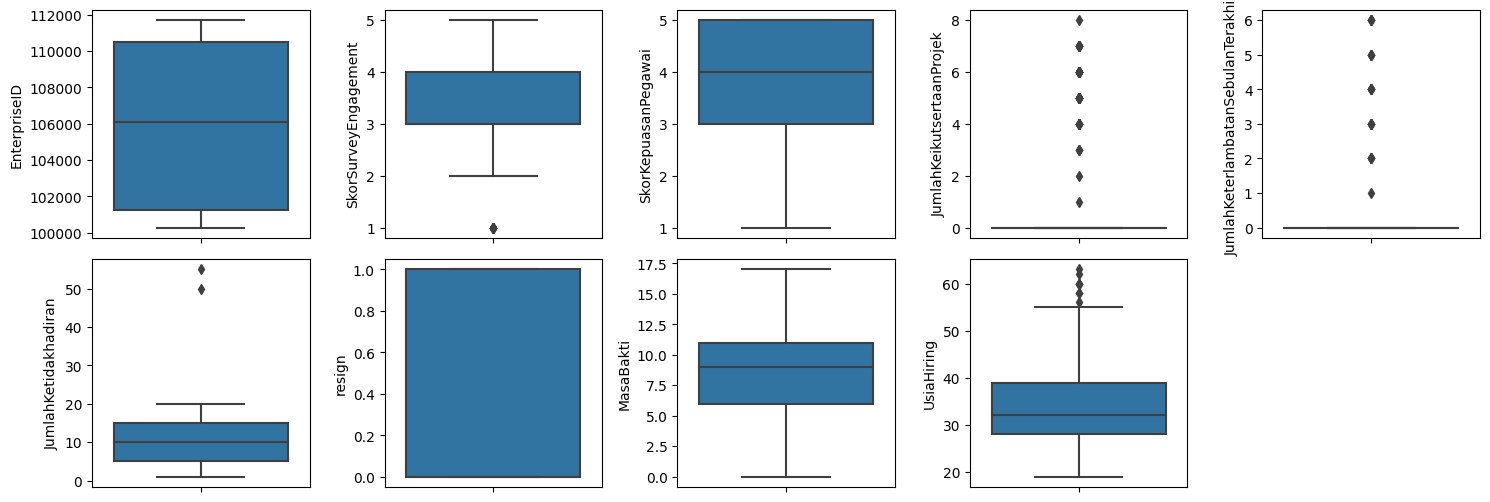

In [ ]:
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 5, i+1)
    sns.boxplot(y=df_ml[nums[i]])
    plt.tight_layout()

In [ ]:
df_ml[nums].describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,resign,MasaBakti,UsiaHiring
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,105923.324042,3.101045,3.905923,1.167247,0.411150,10.439024,0.310105,8.376307,34.080139
std,4044.977599,0.836388,0.905423,2.285537,1.273018,6.829769,0.463344,3.620725,8.854922
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000,28.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,9.000000,32.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000,11.000000,39.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000,17.000000,63.000000


For SkorSurveyEngagement,JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, outliers are tolerated. However, not for the rest due to their high standard deviation.

In [ ]:
nums2 = ['EnterpriseID', 'JumlahKetidakhadiran',	'resign',	'MasaBakti',	'UsiaHiring', 'SkorKepuasanPegawai']

In [ ]:
print(f'Total Rows BEFORE Outlier Handling Z-Score = {len(df_ml)}')

filtered_entries = np.array([True] * len(df_ml))

for col in nums2:
    zscore = abs(stats.zscore(df_ml[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df_ml = df_ml[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling Z-Score = {len(df_ml)}')

Total Rows BEFORE Outlier Handling Z-Score = 287
Total Rows AFTER Outlier Handling Z-Score = 281


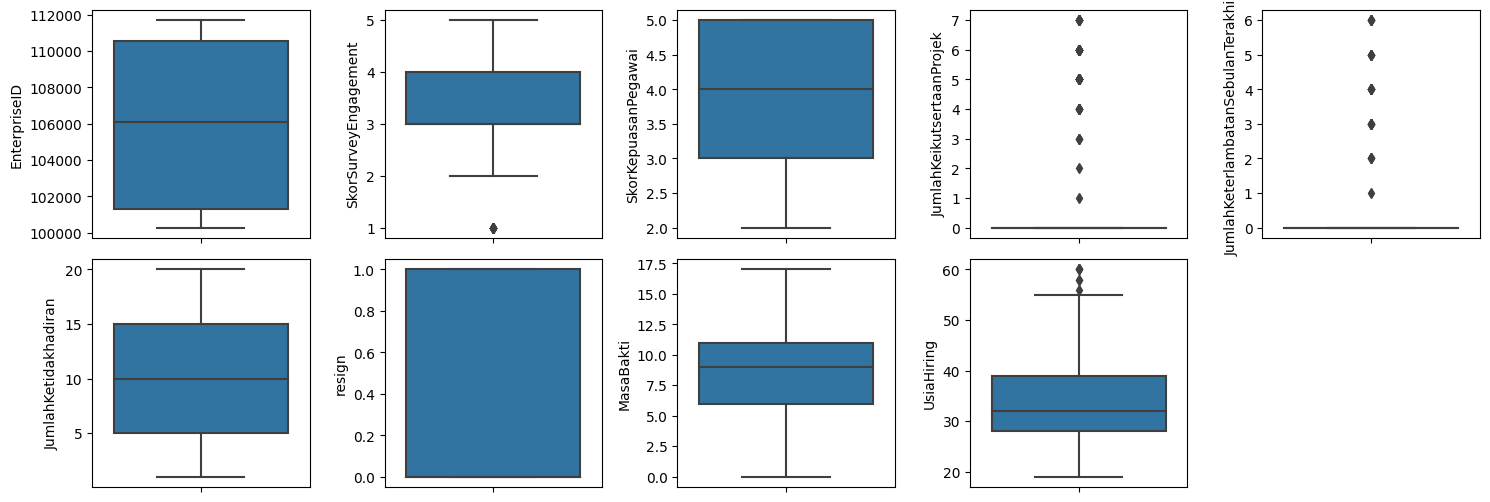

In [ ]:
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(12, 5, i+1)
    sns.boxplot(y=df_ml[nums[i]])
    plt.tight_layout()

In [ ]:
df_ml[nums].describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,resign,MasaBakti,UsiaHiring
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,105979.601423,3.106762,3.921708,1.163701,0.405694,10.103203,0.309609,8.395018,33.960854
std,4030.450246,0.825481,0.874801,2.268157,1.278603,5.859061,0.463157,3.599183,8.565414
min,100282.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000
25%,101331.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000,28.000000
50%,106073.000000,3.000000,4.000000,0.000000,0.000000,10.000000,0.000000,9.000000,32.000000
75%,110533.000000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000,11.000000,39.000000
max,111703.000000,5.000000,5.000000,7.000000,6.000000,20.000000,1.000000,17.000000,60.000000


### Feature Encoding

In [ ]:
df_ml.head()

,EnterpriseID,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,resign,MasaBakti,UsiaHiring
0,111065,Belum_menikah,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4,0,0,9,Magister,0,12,39
1,106080,Belum_menikah,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,4,0,3,Sarjana,1,4,30
2,106452,Menikah,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3,0,0,11,Magister,1,3,37
3,106325,Belum_menikah,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3,0,4,6,Sarjana,0,9,35
4,111171,Belum_menikah,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3,0,0,11,Sarjana,1,5,39


In [ ]:
# Label Encoding
df_ml["StatusPernikahan"] = df_ml["StatusPernikahan"].map(lambda x: "Lainnya" if x == "-" else x)
df_ml["AsalDaerah"] = df_ml["AsalDaerah"].map(lambda x: x.replace(" ", "_"))

career = {'Freshgraduate_program' : 0,
          'Mid_level' : 1,
          'Senior_level' : 2}
df_ml['JenjangKarir'] = df_ml['JenjangKarir'].map(career)

edu = {'Sarjana' : 0,
       'Magister' : 1,
       'Doktor' : 2}
df_ml['TingkatPendidikan'] = df_ml['TingkatPendidikan'].map(edu)

performance = {'Sangat_kurang' : 0,
               'Kurang' : 1,
               'Biasa' : 2,
               'Bagus' : 3,
               'Sangat_bagus' : 4}
df_ml['PerformancePegawai'] = df_ml['PerformancePegawai'].map(performance)

#work divisions
engineering_div = ['Software Engineer (Back End)',
               'Software Engineer (Front End)',
               'Software Engineer (Android)',
               'Software Engineer (iOS)', 
               'DevOps Engineer', 
               'Software Architect', 
               'Machine Learning Engineer']
data_div = ['Data Analyst', 'Data Engineer']
product_div = ['Product Manager', 
               'Product Design (UX Researcher)', 
               'Product Design (UI & UX)', 
               'Digital Product Manager',
               'Scrum Master']

df_ml['Pekerjaan'] = df_ml['Pekerjaan'].map(lambda x: 'engineering_division' if x in engineering_div else \
                                                       'data_division' if x in data_div else 'product_division')

# Frequency Encoding
frequency_logic = df_ml.groupby('HiringPlatform').size()/len(df_ml)
df_ml['HiringPlatform_Encode'] = df_ml['HiringPlatform'].map(frequency_logic)
df_ml.drop(['HiringPlatform'],axis=1,inplace=True)

In [ ]:
df_categorical = df_ml.select_dtypes(include = ['object'])
df_numerical = df_ml.select_dtypes(include = ['int64', 'float64'])

In [ ]:
df_categorical.head()

,StatusPernikahan,StatusKepegawaian,Pekerjaan,AsalDaerah
0,Belum_menikah,Outsource,engineering_division,Jakarta_Timur
1,Belum_menikah,FullTime,data_division,Jakarta_Utara
2,Menikah,FullTime,engineering_division,Jakarta_Timur
3,Belum_menikah,Outsource,engineering_division,Jakarta_Pusat
4,Belum_menikah,FullTime,product_division,Jakarta_Timur


In [ ]:
df_numerical.head()

,EnterpriseID,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,resign,MasaBakti,UsiaHiring,HiringPlatform_Encode
0,111065,0,4,4,4,0,0,9,1,0,12,39,0.085409
1,106080,0,0,4,4,4,0,3,0,1,4,30,0.035587
2,106452,0,3,4,3,0,0,11,1,1,3,37,0.298932
3,106325,0,3,3,3,0,4,6,0,0,9,35,0.238434
4,111171,0,3,3,3,0,0,11,0,1,5,39,0.238434


In [ ]:
df_categorical = pd.get_dummies(df_categorical)
df_categorical.head()

,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_data_division,Pekerjaan_engineering_division,Pekerjaan_product_division,AsalDaerah_Jakarta_Barat,AsalDaerah_Jakarta_Pusat,AsalDaerah_Jakarta_Selatan,AsalDaerah_Jakarta_Timur,AsalDaerah_Jakarta_Utara
0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_ml_ready = pd.concat([df_numerical,df_categorical],axis=1).set_index(['EnterpriseID'])
df_ml_ready.head()

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,resign,MasaBakti,UsiaHiring,HiringPlatform_Encode,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,Pekerjaan_data_division,Pekerjaan_engineering_division,Pekerjaan_product_division,AsalDaerah_Jakarta_Barat,AsalDaerah_Jakarta_Pusat,AsalDaerah_Jakarta_Selatan,AsalDaerah_Jakarta_Timur,AsalDaerah_Jakarta_Utara
EnterpriseID,,,,,,,,,,,,,,,,,,,,,,,,,,,
111065,0,4,4,4,0,0,9,1,0,12,39,0.085409,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
106080,0,0,4,4,4,0,3,0,1,4,30,0.035587,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
106452,0,3,4,3,0,0,11,1,1,3,37,0.298932,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
106325,0,3,3,3,0,4,6,0,0,9,35,0.238434,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
111171,0,3,3,3,0,0,11,0,1,5,39,0.238434,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_ml_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 111065 to 106214
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenjangKarir                        281 non-null    int64  
 1   PerformancePegawai                  281 non-null    int64  
 2   SkorSurveyEngagement                281 non-null    int64  
 3   SkorKepuasanPegawai                 281 non-null    int64  
 4   JumlahKeikutsertaanProjek           281 non-null    int64  
 5   JumlahKeterlambatanSebulanTerakhir  281 non-null    int64  
 6   JumlahKetidakhadiran                281 non-null    int64  
 7   TingkatPendidikan                   281 non-null    int64  
 8   resign                              281 non-null    int64  
 9   MasaBakti                           281 non-null    int64  
 10  UsiaHiring                          281 non-null    int64  
 11  HiringPlatform_Encode               2

### Handle Class Imbalance

In [ ]:
df_ml_ready['resign'].value_counts()

0    194
1     87
Name: resign, dtype: int64

In [ ]:
100.00 * df_ml_ready['resign'].value_counts() / df_ml_ready['resign'].shape[0]

0    69.039146
1    30.960854
Name: resign, dtype: float64

In [ ]:
X = df_ml_ready.drop(columns=['resign'])
y = df_ml_ready['resign']

In [ ]:
print(X.shape)
print(y.shape)

(281, 26)
(281,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
print('X_train size : ', X_train.shape)
print('X_test size  : ', X_test.shape)
print('y_train size : ', y_train.shape)
print('y_test size  : ', y_test.shape)

X_train size :  (224, 26)
X_test size  :  (57, 26)
y_train size :  (224,)
y_test size  :  (57,)


Oversampling Data Split dengan SMOTE

In [ ]:
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# Sebelum Oversampling
print('Target BEFORE oversampling:')
print(pd.Series(y_train).value_counts())

Target BEFORE oversampling:
0    154
1     70
Name: resign, dtype: int64


In [ ]:
# Setelah Oversampling
print('Target AFTER oversampling:')
print(pd.Series(y_train_over).value_counts())

Target AFTER oversampling:
0    154
1    154
Name: resign, dtype: int64


In [ ]:
tl = TomekLinks(sampling_strategy="auto")
rus = RandomUnderSampler(random_state=123)
enn = EditedNearestNeighbours()
senn = SMOTEENN(random_state=123)
stl = SMOTETomek(random_state=123)

In [ ]:
list_all_imbalanced = [tl,rus,enn,senn,stl]

imbalance_strategy = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for imbalanced_learning in list_all_imbalanced:
    print(f"Processing {imbalanced_learning.__class__.__name__}")
    start_time = time.time()
    model = XGBClassifier(verbosity = 0,use_label_encoder = False, random_state = 123)
    #Define pipeline
    pipeline=Pipeline(steps=[("r", imbalanced_learning), ("m", model)])
    
    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    
    imbalance_strategy.append(imbalanced_learning.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
#clear_output()
df_evaluation = pd.DataFrame({"Imbalance_Strategy":imbalance_strategy,
                              "Accuracy": score_accuracy,
                              "Precision": score_precision,
                              "Recall": score_recall,
                              "AUC": score_auc,
                              "Training_Time": time_training})
df_evaluation.sort_values(["AUC"],ascending=False)

Processing TomekLinks


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Processing RandomUnderSampler


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Processing EditedNearestNeighbours


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Processing SMOTEENN


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Processing SMOTETomek


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



,Imbalance_Strategy,Accuracy,Precision,Recall,AUC,Training_Time
4,SMOTETomek,0.940448,0.938179,0.925496,0.978671,00:00:05
0,TomekLinks,0.931555,0.929270,0.915159,0.977837,00:00:06
3,SMOTEENN,0.927404,0.921145,0.918661,0.974444,00:00:03
1,RandomUnderSampler,0.933136,0.925406,0.930446,0.974028,00:00:02
2,EditedNearestNeighbours,0.921542,0.911204,0.919573,0.970218,00:00:02


### Modelling

In [ ]:
#Initialize the classifier model
clf_1 = RandomForestClassifier(random_state=0)
clf_2 = LogisticRegression()
clf_3 = DecisionTreeClassifier(random_state=0)
clf_4 = AdaBoostClassifier(random_state=0,base_estimator=clf_3)
clf_5 = KNeighborsClassifier()
clf_6 = XGBClassifier(random_state=0)
clf_7 = CatBoostClassifier(random_state=0)

classifier_list = [clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7]

In [ ]:
# Melakukan Threholding Vanila Model

ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")
    
    start_time = time.time()
    #tl = TomekLinks(sampling_strategy="auto")
    
    #Define pipeline
    pipeline=Pipeline(steps=[("r", SMOTE()), ("m", model)])
    
    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    
    scores = cross_validate(pipeline, 
                            X_train, 
                            y_train, 
                            scoring = scoring, 
                            cv = cv, 
                            n_jobs = -1)
    
    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))
    
# Hasil
#clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})
df_model.sort_values(["AUC"],ascending=False)

Processing RandomForestClassifier
Processing LogisticRegression
Processing DecisionTreeClassifier
Processing AdaBoostClassifier
Processing KNeighborsClassifier
Processing XGBClassifier
Processing CatBoostClassifier


,ML_Model,Accuracy,Precision,Recall,AUC,Training_Time
6,CatBoostClassifier,0.928854,0.921665,0.919702,0.981190,00:00:48
5,XGBClassifier,0.940514,0.935854,0.928036,0.978056,00:00:03
1,LogisticRegression,0.930435,0.926469,0.915526,0.976766,00:00:02
0,RandomForestClassifier,0.931752,0.922586,0.924325,0.967341,00:00:10
4,KNeighborsClassifier,0.907905,0.898623,0.900476,0.960248,00:00:01
2,DecisionTreeClassifier,0.915217,0.905365,0.909702,0.909702,00:00:00
3,AdaBoostClassifier,0.910870,0.899437,0.906577,0.906577,00:00:01


We will use the CatBoostClassifier model.

In [ ]:
# Hyperparameter Space
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.quniform('n_estimators',100,500,20),
    "max_depth" : hp.quniform('max_depth', 3, 10, 1)
}

def rskf_metrics(model, X, y, scoring_used = "precision", cv_method = "", nfolds = 10):
    if cv_method == "":
        cv_method = RepeatedStratifiedKFold(n_splits=nfolds, n_repeats=3, random_state=1)
        
    metrics_calculation= cross_val_score(model, X, y, scoring=scoring_used, cv = cv_method)
    
    return(metrics_calculation)

def objective(params,
              n_folds=10,
              X=X_train_over, 
              y=y_train_over, 
              scoring_used="precision",
              cv_used=""):

    global ITERATION
    ITERATION += 1
    
    # Perform n_folds cross validation
    start = timer()
    
    # Perform n_folds cross validation
    model_hyper = CatBoostClassifier(random_state = 123,verbose=0, **params)
    
    # slfk
    run_time = timer() - start
    
    # Extract the best score
    
    metrics_used = np.mean(rskf_metrics(model_hyper, X, y))
    
    # Dictionary with information for evaluation
    return {'loss': metrics_used, 'params': params, 'iteration': ITERATION, 
            'train_time': run_time, 'status': STATUS_OK}

In [ ]:
%%time

# Global variable
global  ITERATION

ITERATION = 0

# optimization algorithm
tpe_algorithm = tpe.suggest

# Hyperopts Trials() records all the model and run artifacts.
trials = Trials()

# Fmin will call the objective funbction with selective param set. 
# The choice of algorithm will narrow the searchspace.

best_classifier = fmin(objective, space, algo=tpe_algorithm,
                       max_evals=100, trials=trials)

100%|██████████| 100/100 [13:57<00:00,  8.38s/trial, best loss: 0.9257263460939932]
CPU times: user 18min 13s, sys: 3min 7s, total: 21min 21s
Wall time: 13min 57s


In [ ]:
# Best_params of the best model
best_params = space_eval(space, best_classifier)
best_params

{'learning_rate': 0.012842043199087608,
 'max_depth': 3.0,
 'n_estimators': 100.0}

In [ ]:
catboost_model = CatBoostClassifier(random_state = 123, **best_classifier)
catboost_model.fit(X_train_over,y_train_over,verbose=0)

y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:,1]

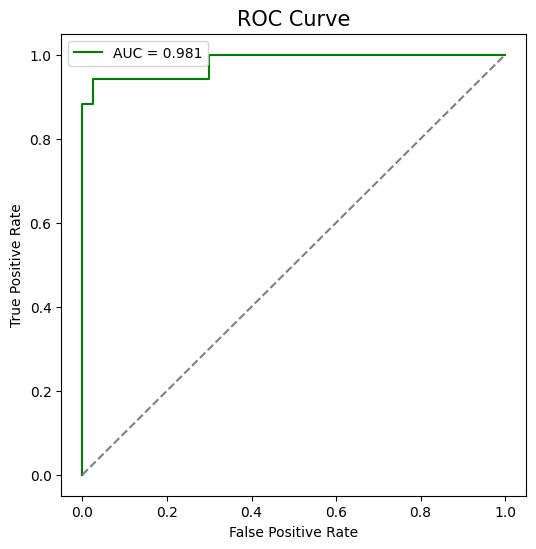

In [ ]:
fpr, tpr, tr = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc, color='green')
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()
plt.show()

In [ ]:
# classification report
y_pred_class = []

for i in y_pred_proba:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.94      0.94      0.94        17

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



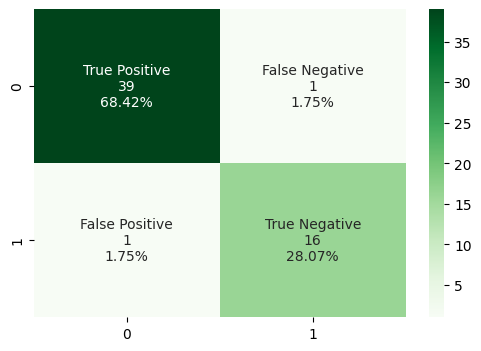

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_class)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_pcts = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_pcts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.show()

In [ ]:
!pip install sklearn.inspection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.inspection (from versions: none)
ERROR: No matching distribution found for sklearn.inspection


## Stage 5: Presenting Machine Learning Products to the Business Users

1. Dari model machine learning yang sudah diselesaikan pada Tugas 4, lanjutkan dengan mencari metode Interpretable / Explainable AI yang ada untuk mendapatkan insight-insight yang berhubungan dengan permasalahan utama. (Hint: Gunakan Interpretable method apabila model machine learning berupa tree-based model (pendekatannya dengan membuat decision tree diagram), atau berupa regression-based model (pendekatannya dengan membuat math formula yang bisa diartikan). Namun, gunakanlah Explainable method apabila model machine learning merupakan ensemble method atau neural network seperti feature importance, partial dependence plot, shapley value, lime, dan lain-lain.) 
2. Carilah insight menarik dari alat-alat Interpretable / Explainable AI yang bisa menjawab pertanyaan bisnis seputar kepegawaian perusahaan. (Hint: Carilah variabel yang paling mempengaruhi orang untuk melakukan resign, atau berapa besar perbedaan pengaruh predictive power antara variabel A dan B dengan skala yang ada, kemudian adakah threshold tertentu (angka) yang bisa membuat orang itu memiliki probabilitas resign lebih tinggi dibanding yang lain, dan lain-lain)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


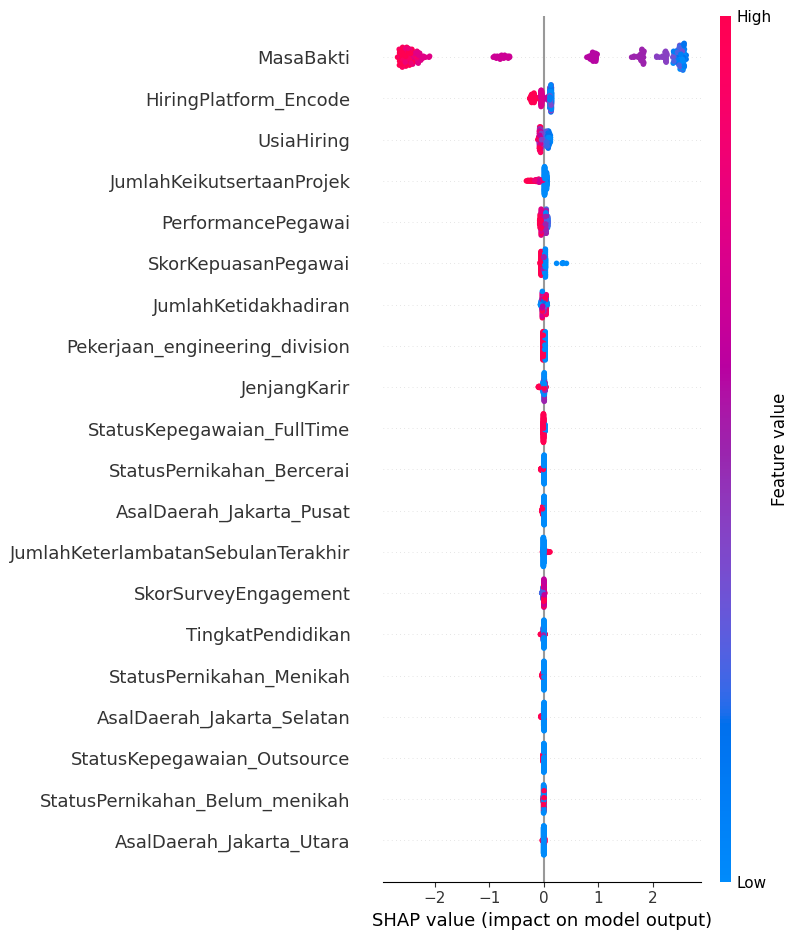

In [ ]:
import shap
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_train_over)
shap.summary_plot(shap_values, X_train_over, plot_type='dot')

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(5).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Scale of Variable Importance')
    plt.ylabel('Variable Names')
    plt.title('Most Importance Variables based on Machine Learning')

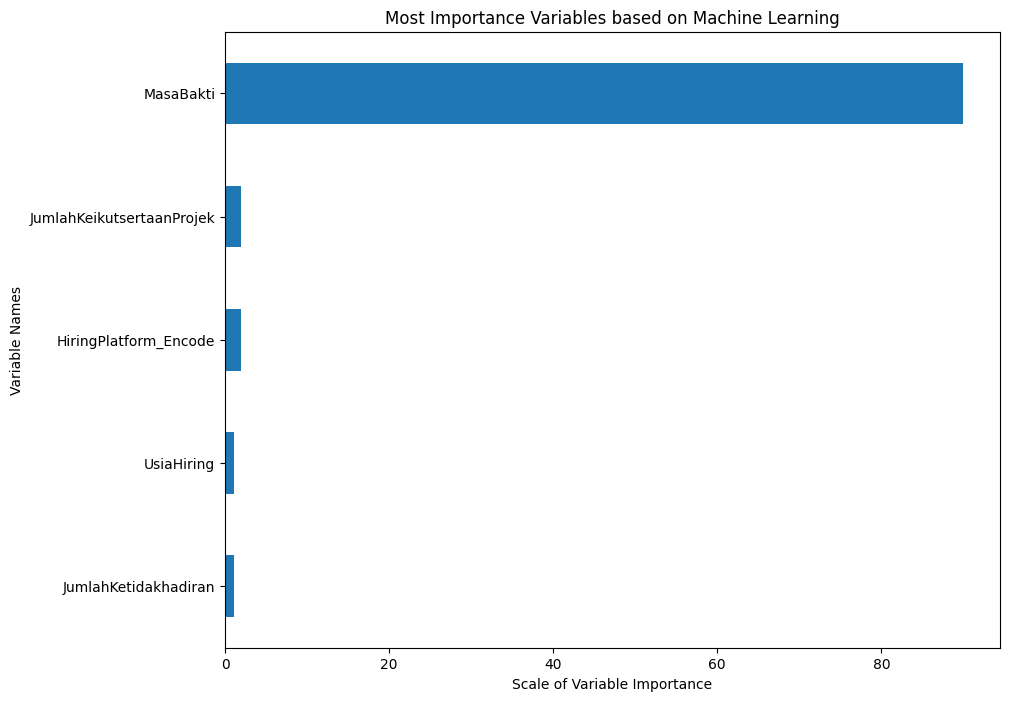

In [ ]:
show_feature_importance(catboost_model)

In [ ]:
!pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
from sklearn.inspection import plot_partial_dependence

# We try to compare 4 features using partial dependence
fig, ax = plt.subplots(2,2, figsize=(16, 5))
pdp1 = plot_partial_dependence(catboost_model, X_train_over,["MasaKerja"], ax=ax[0,0])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("Work Period of Employee")
pdp2 = plot_partial_dependence(catboost_model, X_train_over,["JenjangKarir"], ax=ax[0,1])
pdp2.axes_[0,0].set_ylabel("Resign Probability")
pdp2.axes_[0,0].set_xlabel("Career Path of Employee")
pdp3 = plot_partial_dependence(catboost_model, X_train_over,["PerformancePegawai"], ax=ax[1,0])
pdp3.axes_[0,0].set_ylabel("Resign Probability")
pdp3.axes_[0,0].set_xlabel("Performance Engagement of Employee")
pdp4 = plot_partial_dependence(catboost_model, X_train_over,["is_include_project"], ax=ax[1,1])
pdp4.axes_[0,0].set_ylabel("Resign Probability")
pdp4.axes_[0,0].set_xlabel("Project Assigned of Employee")
plt.tight_layout()
plt.show()

ImportError: ignored